In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

#### MPT
Modern Portfolio Theory (MPT)
Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

#### Efficient frontier
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

#### Variance
The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).


#### Volatility
Volatility is measured as the standard deviation of a company’s stock.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.


#### Covariance
Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely.
#### Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

#### Correlation
Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

#### Expected Returns
Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.



#### Weights
Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

#### Total expected return
𝐸(𝑅𝑝)=𝑤1𝐸(𝑅1)+𝑤2𝐸(𝑅2)+…..𝑤𝑛𝐸(𝑅𝑛)

### Building an optimal risky portfolio
Calculate the weights of assets for each one. Then, calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. Compare the results with Sharpe Ratio.

In [28]:
# Import data
Stocks = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
Stocks.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2015-01-02  24.861401  44.347309  529.549988  308.519989  27.332500   
2015-01-05  24.161013  43.633312  519.460022  302.190002  26.562500   
2015-01-06  24.163294  43.376633  506.640015  295.290009  26.565001   
2015-01-07  24.502111  44.272652  505.149994  298.420013  26.937500   
2015-01-08  25.443539  45.294640  506.910004  300.459991  27.972500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   
2015-01-08  48.529999  506.910004  300.459991  28.037500  48.549999  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   
2015-01-08  495.019989  296.109985  27.307501  47.830002  501.510010   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  
2015-01-08  300.320007  237458000.0  5978200.0  3652700.0  3088400.0  

[5 rows x 24 columns]

In [29]:
# Closing price
df = Stocks['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.861401,44.347309,529.549988,308.519989
2015-01-05,24.161013,43.633312,519.460022,302.190002
2015-01-06,24.163294,43.376633,506.640015,295.290009
2015-01-07,24.502111,44.272652,505.149994,298.420013
2015-01-08,25.443539,45.294640,506.910004,300.459991


#### Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other.

In [30]:
# Log of percentage change, methods: .pct_change()  and  np.log(1+x)
# covariance : .cov()
# 但cov对彼此间的强弱关系度量magnitude不是很直观 
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [31]:
# .corr() 直观看出相关程度
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360910,0.524818,0.496610
NKE,0.360910,1.000000,0.387435,0.341529
GOOGL,0.524818,0.387435,1.000000,0.647942
AMZN,0.496610,0.341529,0.647942,1.000000


#### Portfolio Variance
The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix..

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$
wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

In [32]:
# Randomly weighted portfolio's variance
# .mul() methods simply means multiply
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079365307815926

to understand portfolio variance better, check out separated steps

In [38]:
# print(cov_matrix.mul(w, axis=0).mul(w, axis=1).sum())
# print('\n port_var = {}'.format(cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()))

#### Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

use the resample() function to get yearly returns. If we don't perform resampling, we will get daily returns, like you saw earlier above.

In [39]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [40]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20549015582506405

#### Plotting the efficient frontier
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.



In [41]:
# Volatility is given by the annual standard deviation. Multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [42]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets # AMZN有着对打的risk和return

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


To plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination

In [43]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights,cumulative sum must be 1

num_assets = len(df.columns)
num_portfolios = 10000 # Run 10000 times

In [44]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
# 10000 times needs approximately 12 seconds

In [45]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [46]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.267168,0.194908,0.511622,0.373851,0.087364,0.027164
1,0.244962,0.212424,0.181364,0.085398,0.365815,0.367423
2,0.253184,0.190074,0.367600,0.345924,0.146411,0.140066
3,0.228667,0.196741,0.137544,0.306646,0.251183,0.304627
4,0.254037,0.251109,0.009870,0.007414,0.295522,0.687193


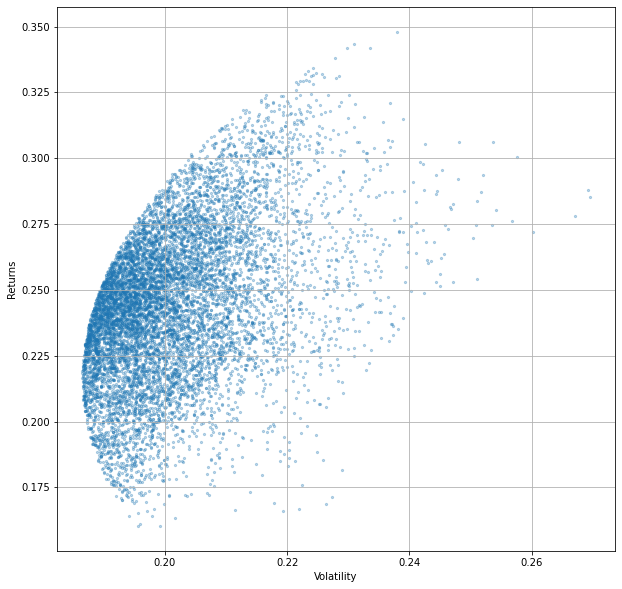

In [50]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=5, alpha=0.3, grid=True, figsize=[10,10]);

In [51]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.218305
Volatility      0.186519
AAPL weight     0.260833
NKE weight      0.406292
GOOGL weight    0.287622
AMZN weight     0.045253
Name: 1897, dtype: float64

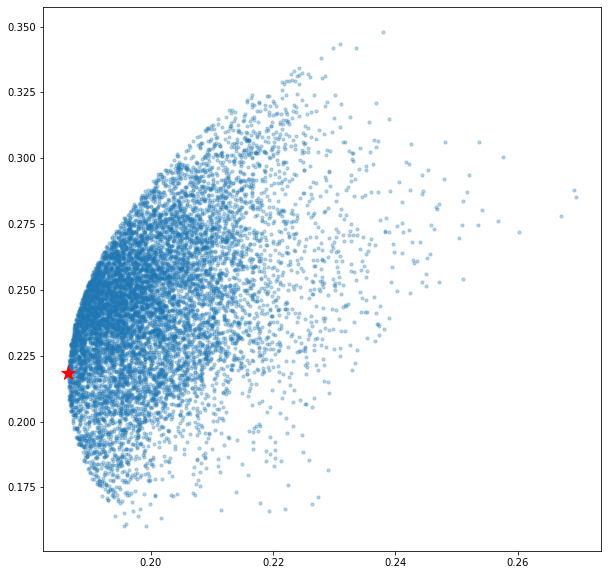

In [55]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);

#### Sharpe Ratio
Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

In [58]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.324029
Volatility      0.216560
AAPL weight     0.683297
NKE weight      0.104822
GOOGL weight    0.018172
AMZN weight     0.193710
Name: 5002, dtype: float64

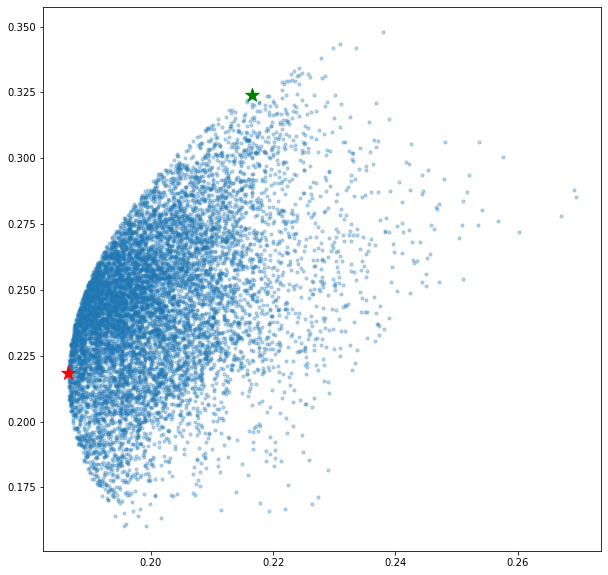

In [60]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=200);